From Newman, Chapter 6

## Binary search method / Bisection method ##

<img src="./newman/fig6-3.png" width="300"><br>
**Fig 6.3. The binary search method.** If $f(x_1)$ and $f(x_2)$ have opposite signs, one positive and one negative, and if $f(x)$ is continuous from $x_1$ to $x_2$, then there must be at least one root of $f(x)$ between $x_1$ and $x_2$. By looking at the sign of the function at the midpoint between $x_1$ and $x_2$ denoted $x'$ here, we can determine whether the root lies in the left or the right half of the interval.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def midpoint(left, right):
    return (left + right)/2.

In [3]:
def plot_function(f, a, b):
    n = 100
    x = np.linspace(a, b, n)
    plt.plot(x, f(x))
    plt.plot(x, np.zeros(n))
    plt.xlabel('x')
    plt.legend([r'$f(x)$', r'$0$'])

In [4]:
def trig_function(x):
    return np.sin(x)

In [5]:
def poly_function(x):
    return 3*x**2 - 5*x + 1

In [6]:
def bisection(f, a, b, resolution):
    left = a
    right = b
    midpt = midpoint(left, right)
    
    #Is there a crossing?
    if(f(left)*f(right))>=0:
        print("Can't use the bisection method - zero or even number of crossings")
        return np.NaN, np.NaN
    
    while(right-midpt) > resolution:
        if (f(left) * f(midpt)) < 0: #crossing occurred
            right = midpt
        else:
            left = midpt
        midpt = midpoint(left, right)
        #print(midpt)
    return midpt, resolution

In [7]:
print("%f plus/minus %f" % bisection(trig_function, 3, 5, 0.00001))

3.141594 plus/minus 0.000010


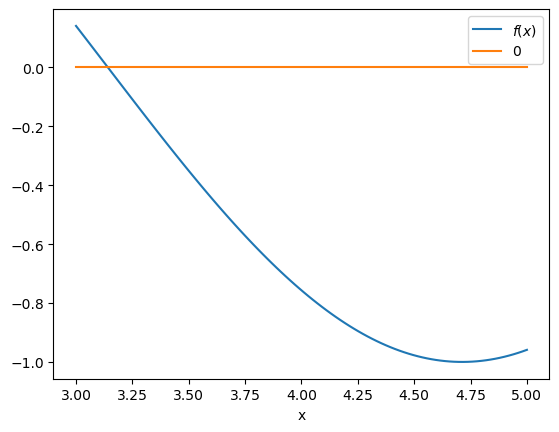

In [8]:
plot_function(trig_function, 3, 5)

In [9]:
print("%f plus/minus %f" % bisection(poly_function, 1, 1.5, 0.00001))

1.434258 plus/minus 0.000010


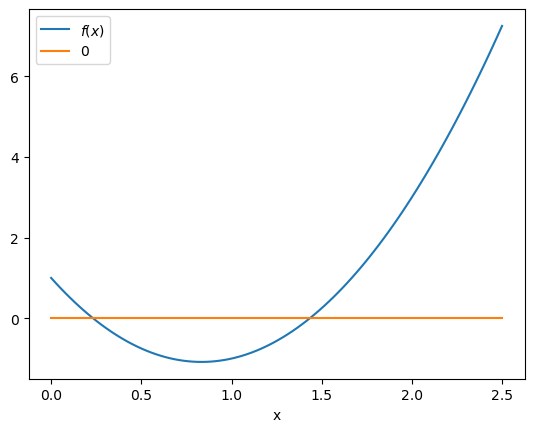

In [10]:
plot_function(poly_function, 0, 2.5)

## Newton's method

<img src="./newman/fig6-6.png" width="300"><br>
**Fig 6.6. Newton's method.** Newton's method takes a single estimate $x$ of the root of a function and uses the slope of the function at that point to extrapolate a better estimate $x'$.

In [11]:
def trigo_function(x):
    return np.sin(x)

def deriv_trigo_function(x):
    return np.cos(x)

In [35]:
def newton_step(f, slope, x):
    #from: slope(x) = f(x)/delta_x
    delta_x = f(x)/slope(x)
    #from: delta_x = x - x_xprime
    x_prime = x - delta_x
    return x_prime, delta_x

def newton(f, slope, x_init, resolution):
    iterations = 0
    max_iterations = 50
    x, delta_x = newton_step(f, slope, x_init)
    while ((abs(delta_x) > resolution) and (iterations < max_iterations)):
        x, delta_x = newton_step(f, slope, x)
        iterations += 1
        if iterations == max_iterations:
            print("Eject! I don't think this is going to work.")
        #print(x, delta_x)
    return x, abs(delta_x)

In [36]:
print("%f plus/minus %f" % newton(trigo_function, deriv_trigo_function, 3, 0.00001))

3.141593 plus/minus 0.000000


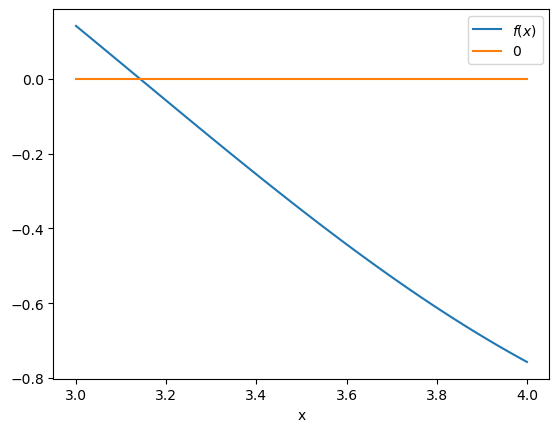

In [33]:
plot_function(trigo_function, 3, 4)

## Golden ratio search

<img src="./newman/fig6-9.png" width="300"><br>
**Fig 6.9. Golden ratio search.** Suppose there is a minimum of the function $f(x)$ between $x_1$ and $x_4$. If the function is lower at $x_2$ than at $x_3$, as shown here, then we know the minimum must lie between $x_1$ and $x_3$; otherwise, it lies between $x_2$ and $x_4$. Either way, we have narrowed the range in which it lies.

Referring to Fig 6.9. Since, we generally don't know where the root would be located in the interval, we pick a symmetric placement for $x_2$ and $x_3$, i.e. $x_3 - x_1 = x_4 - x_2$. Now, where inside should we locate $x_2$ and $x_3$? If we make $x_2$ and $x_3$ very close to the middle, that makes this step efficient -- because it gives the narrowest interval between the new interval, i.e. either $(x_1, x_3)$ or $(x_2, x_4)$. But that makes the next step inefficient because the new interior points would be farther from the center. Instead, we choose $x_2$ and $x_3$ so that the current step and the step after would put the interior points equally close to the center of the interval. Define $z$ to be the width of a bracketing interval before and after a step of the search process. Suppose the minimum is located between $x_1$ and $x_3$, then <br>
\begin{equation}
z = \frac{x_4 - x_1}{x_3 - x_1} = \frac{x_3 -x_1 + x_2 - x_1}{x_3 - x_1} = 1 + \frac{x_2 - x_1}{x_3 - x_1}
\end{equation}
Calculate the new $z$ for the next step of the algorithm,
\begin{equation}
z = \frac{x_3 - x_1}{x_2 - x_1}
\end{equation}
For efficient scaling, equate the two $z$'s, obtain:
\begin{equation}
z = 1/z + 1 \\
z^2 - z - 1 = 0 \\
z = \frac{1 + \sqrt{5}}{2}
\end{equation}
